In [3]:
import sys, os
sys.path.append(os.getcwd())
print(sys.path)

['/Users/chrisg/miniconda3/envs/drlnd/lib/python36.zip', '/Users/chrisg/miniconda3/envs/drlnd/lib/python3.6', '/Users/chrisg/miniconda3/envs/drlnd/lib/python3.6/lib-dynload', '', '/Users/chrisg/miniconda3/envs/drlnd/lib/python3.6/site-packages', '/Users/chrisg/miniconda3/envs/drlnd/lib/python3.6/site-packages/IPython/extensions', '/Users/chrisg/.ipython', '/Users/chrisg/dev/deep-reinforcement-navigation', '/Users/chrisg/dev/deep-reinforcement-navigation']


In [4]:
from unityagents import UnityEnvironment
import numpy as np

In [5]:
env = UnityEnvironment(file_name="Banana.app", no_graphics=False, seed=0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [8]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
brain

In [9]:
env_info = env.reset(train_mode=False)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

In [10]:
from model import QNetwork

qnetwork_trial = QNetwork(state_size, action_size, 0)
qnetwork_trial

QNetwork(
  (fc1): Linear(in_features=37, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=4, bias=True)
)

In [11]:
from dqn_agent import Agent

agent = Agent(state_size, action_size, seed=0)

In [12]:
import torch

# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint_m02.pth'))

<All keys matched successfully>

In [13]:
from random import randrange
randrange(1,3)

2

In [14]:
step = 0
eps = 0
scores = []
sequence = 10
fifo = [0] * sequence
fifo_0 = [0,1,2,3,4]
fifo_1 = [0,1,2,3,4]
fifo_2 = [0,1,2,3,4]
fifo_3 = [0,1,2,3,4]
f = open('agent.log','w')
for e in range(100):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0    
    while True:
        action = agent.act(state, eps)
        fifo.pop(0)
        fifo.append(action)
        f.write('f %s \n' % str(fifo))
        r1 = step % 2
        r2 = step % 4
        if r1 == 0:
            #print('alt', step)
            fifo_0.pop(0)
            fifo_0.append(action)
        else:
            fifo_1.pop(0)
            fifo_1.append(action)
        
        if r2 == 0 or r2 == 1:
            #print ('dual', step)
            fifo_2.pop(0)
            fifo_2.append(action)
        else:
            fifo_3.pop(0)
            fifo_3.append(action)
                
            
        f.write('f0 %s \n' % str(fifo_0))
        f.write('f1 %s \n' % str(fifo_1))
        f.write('f2 %s \n' % str(fifo_2))
        f.write('f3 %s \n' % str(fifo_3))
        
        if fifo_0.count(fifo_0[0]) == len(fifo_0):
            if fifo_1.count(fifo_1[0]) == len(fifo_1):
                if fifo_0[0] != 0 or fifo_1[0] != 0:
                    action = randrange(1,3)
                    f.write('f0 random action %s \n' % str(action))
            
        if fifo_2.count(fifo_2[0]) == len(fifo_2):
            if fifo_3.count(fifo_3[0]) == len(fifo_3):
                if fifo_2[0] != 0 or fifo_3[0] != 0:
                    action = randrange(1,3)
                    f.write('f2 random action %s \n' %  str(action))            
            
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state
        step += 1                                      # roll over the state to next time step
        if done:
            scores.append(score)                       # exit loop if episode finished
            print("Score: {}".format(score))
            break

f.close()

Score: 16.0
Score: 17.0
Score: 9.0
Score: 24.0
Score: 15.0
Score: 17.0
Score: 20.0
Score: 15.0
Score: 14.0
Score: 22.0
Score: 16.0
Score: 22.0
Score: 21.0
Score: 17.0
Score: 16.0
Score: 19.0
Score: 10.0
Score: 18.0
Score: 17.0
Score: 19.0
Score: 17.0
Score: 16.0
Score: 15.0
Score: 19.0
Score: 16.0
Score: 17.0
Score: 15.0
Score: 23.0
Score: 13.0
Score: 16.0
Score: 18.0
Score: 18.0
Score: 9.0
Score: 16.0
Score: 20.0
Score: 14.0
Score: 25.0
Score: 18.0
Score: 18.0
Score: 17.0
Score: 14.0
Score: 16.0
Score: 16.0
Score: 20.0
Score: 18.0
Score: 17.0
Score: 13.0
Score: 25.0
Score: 24.0
Score: 13.0
Score: 16.0
Score: 17.0
Score: 21.0
Score: 26.0
Score: 15.0
Score: 17.0
Score: 14.0
Score: 18.0
Score: 17.0
Score: 16.0
Score: 16.0
Score: 19.0
Score: 19.0
Score: 14.0
Score: 21.0
Score: 21.0
Score: 20.0
Score: 23.0
Score: 18.0
Score: 13.0
Score: 17.0
Score: 20.0
Score: 19.0
Score: 22.0
Score: 17.0
Score: 17.0
Score: 22.0
Score: 16.0
Score: 16.0
Score: 16.0
Score: 27.0
Score: 21.0
Score: 9.0
Score: 

In [15]:
print('average score ', sum(scores)/len(scores))

average score  17.75


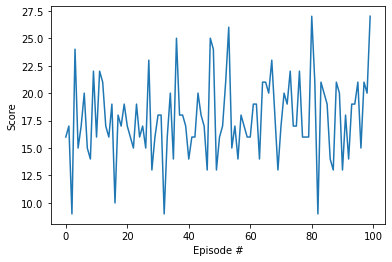

In [19]:
import matplotlib.pyplot as plt

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
#plt.show()
plt.savefig('navigation.png')
plt.show()

In [13]:
env.close()